In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

init_printing()
x, r = symbols('x r')

In [2]:
#Equation 8.8

Xdot = r*x - x**2
eq_pts = solve([Xdot], (x))
eq_pts

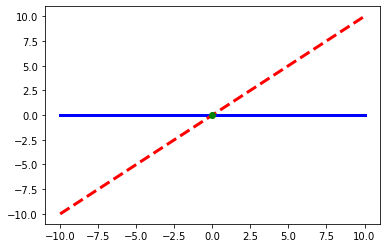

In [3]:
def xeq4(r):
    return r
domain = np.linspace(-10, 10)
plt.plot(domain, [0 for each in range(len(domain))], 'b-', linewidth=3)
domain = np.linspace(-10, 10)
plt.plot(domain, xeq4(domain), 'r--', linewidth=3)
plt.plot([0], [0], 'go')
plt.show()

In [4]:
#Equation 8.10

Xdot = r*x - x**3
eq_pts = solve([Xdot], (x))
eq_pts

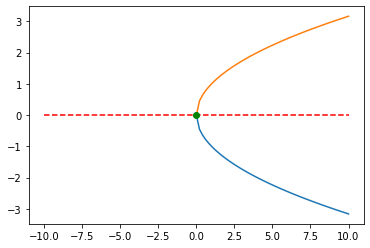

In [5]:
def xeq1():
    return 0

def xeq2(r):
    return -np.sqrt(r)

def xeq3(r):
    return np.sqrt(r)

domain = np.linspace(-10, 10)
plt.plot(domain, [0 for each in range(len(domain))], 'r--')
domain = np.linspace(0, 10)
plt.plot(domain, xeq2(domain))
plt.plot(domain, xeq3(domain))
plt.plot([0], [0], 'go')
plt.show()

In [6]:
#Equation 8.2
Xdot = r - x**2
solve([Xdot], (x))

In [7]:
def eq1(r):
    return -1*np.sqrt(r)

def eq2(r):
    return np.sqrt(r)

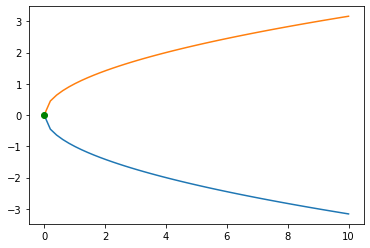

In [8]:
domain = np.linspace(0, 10)
plt.plot(domain, eq1(domain))
plt.plot(domain, eq2(domain))
plt.plot([0], [0], 'go')
plt.show()

In [9]:
#Exercise 8.1

Xdot = r*x*(x + 1) - x
solve([Xdot], (x))

In [10]:
def eq(r):
    return -(r-1)/r

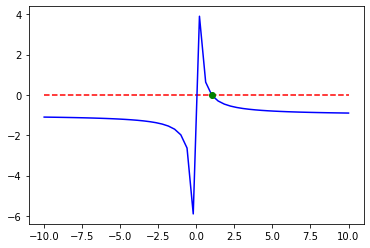

In [11]:
domain = np.linspace(-10, 10)
plt.plot(domain, [0 for each in range(len(domain))], 'r--')
plt.plot(domain, eq(domain), 'b-')
plt.plot([1], [0], 'go')
plt.show()

In [12]:
J = Xdot.diff(x)
J

In [13]:
J.subs(x, 0)

In [14]:
J.subs(x, solve([Xdot], (x))[1][0])

In [15]:
solve(J.subs(x, 0), r)

In [16]:
solve(J.subs(x, solve([Xdot], (x))[1][0]), r)

In [17]:
#Critical value is r = 1
solve([Xdot], (x))[1][0] # solve this to find `r` such that r > 0 => r < 1 (model is unstable)
#Unstable for r < 1

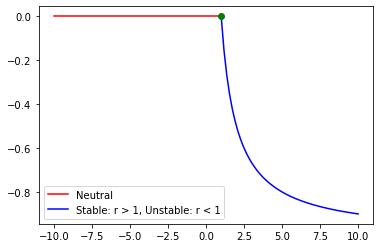

In [18]:
domain = np.linspace(-10, 1)
domain2 = np.linspace(1, 10)

def eq(r):
    return -(r-1)/r

plt.plot(domain, [0 for each in range(len(domain))], 'r-', label='Neutral')
plt.plot(domain2, eq(domain2), 'b-', label='Stable: r > 1, Unstable: r < 1')
plt.plot([1], [0], 'go')
plt.legend()
plt.show()

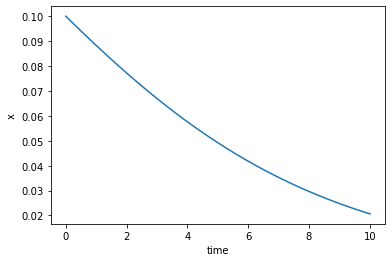

In [19]:
Dt = 0.01
def initialize():
    global x, t, xresult, tresult
    x = 0.1
    t = 0.0
    xresult = [x]
    tresult = [t]

def update():
    global x, t
    dFUNC = r*x*(x + 1) - x
    x = x + (dFUNC) * Dt
    t = t + Dt
    
def observe():
    global x, t, xresult, tresult
    xresult.append(x)
    tresult.append(t)

r = 0.8
initialize()
while t < 10:
    update()
    observe()
plt.plot(tresult, xresult)
plt.xlabel('time')
plt.ylabel('x')
plt.show()

In [20]:
def model(rconst, dt, t_not, X_not, tdomain):

    t_results = [t_not]
    X_results = [X_not]

    while t_results[-1] < tdomain:

        Xdot = (rconst * X_results[-1]) * (X_results[-1] + 1) - X_results[-1]
        nx = X_results[-1]  + Xdot * dt
        
        r*x*(x + 1) - x

        time = t_results[-1] + dt

        t_results.append(time) 
        X_results.append(nx) 

    results = {}
    results['time'] = t_results
    results['x'] = X_results

    return results

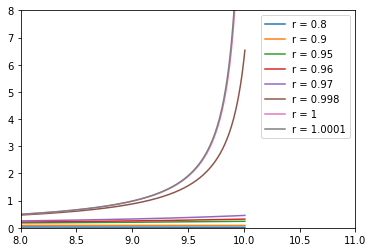

In [21]:
domain = [0.8, 0.9, 0.95, 0.96, 0.97, 0.998, 1, 1.0001]
for each in domain:
    run = model(rconst=each, dt=0.01, t_not=0.0, X_not=0.1, tdomain=10)
    plt.plot(run['time'], run['x'], label='r = ' + str(each))
    plt.legend()
plt.xlim(8, 11)
plt.ylim(0, 8)
plt.show()